In [3]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


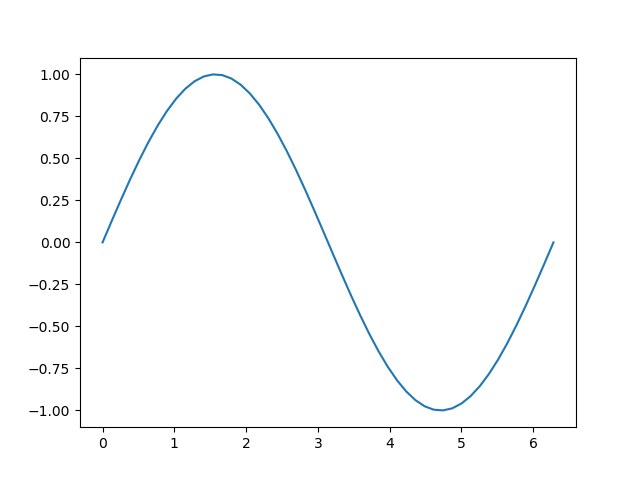

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [4]:
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

In [6]:
columns=['a','b','c']
data = np.cumsum(np.random.rand(10,3),axis=1)
df = pd.DataFrame(data,columns=columns)

def g(x,y):
    plt.scatter(df[x], df[y])
    plt.show()

interactive_plot = interactive(g, x=columns, y=columns)
interactive_plot

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Dropdown(description='y',…

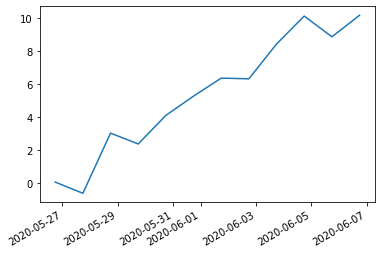

In [2]:
import datetime
import random
import matplotlib.pyplot as plt

# make up some data
x = [datetime.datetime.now() + datetime.timedelta(days=i) for i in range(12)]
y = [i+random.gauss(0,1) for i,_ in enumerate(x)]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
#three stage
#pick neighbirhood

#trend line
#heat map

In [ ]:
columns=['a','b','c']
data = np.cumsum(np.random.rand(10,3),axis=1)
df = pd.DataFrame(data,columns=columns)

# make up some data
x = [datetime.datetime.now() + datetime.timedelta(days=i) for i in range(12)]
y = [i+random.gauss(0,1) for i,_ in enumerate(x)]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()


def g(x,y):
    plt.scatter(df[x], df[y])
    plt.show()

interactive_plot = interactive(g, x=columns, y=columns)
interactive_plot

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib notebook

In [23]:
import sys
import os

project_path = os.path.abspath(os.path.join('..'))


In [45]:
#df = pd.read_csv(project_path+ "/data/redfin/redfin_2020-04-21-15-31-48.csv")
df = pd.read_csv(project_path+ "/data/redfin/All_King_Redfin.csv")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
#df_neighborhood = gpd.read_file("City_Clerk_Neighborhoods (1).geojson")
#df_neighborhood = gpd.read_file("https://gisdata.kingcounty.gov/arcgis/rest/services/OpenDataPortal/admin___base/MapServer/790/query?where=1%3D1&outFields=*&outSR=4326&f=json")
df_zip_shape = gpd.read_file("https://opendata.arcgis.com/datasets/06da0f67fc1948e3aae93063750ad02b_790.geojson")
df_zip_shape.head()

FileNotFoundError: [Errno 2] File /home/richard/data515_project/data/redfin/All_King_Redfin.csv does not exist: '/home/richard/data515_project/data/redfin/All_King_Redfin.csv'

In [44]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
       'geometry'],
      dtype='object')

<IPython.core.display.Javascript object>


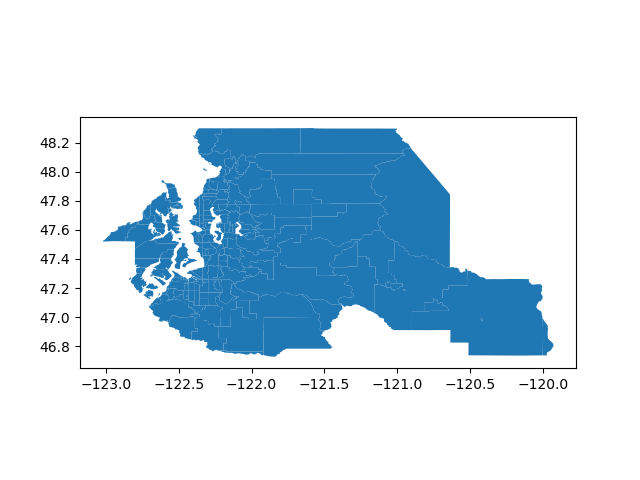

In [28]:
#df_n_c = df_zip_shape.loc[df_zip_shape['S_HOOD'] != "OOO"]
df_n_c = df_zip_shape
df_n_c.plot()

In [29]:
df_n_c_small = df_n_c[['ZIP', 'geometry']]
df_n_c_small.head()

,ZIP,geometry
0,98031,"POLYGON ((-122.21842 47.43750, -122.21896 47.4..."
1,98032,"MULTIPOLYGON (((-122.24187 47.44122, -122.2436..."
2,98033,"POLYGON ((-122.20571 47.65170, -122.20571 47.6..."
3,98034,"POLYGON ((-122.17551 47.73706, -122.17551 47.7..."
4,98030,"POLYGON ((-122.16746 47.38549, -122.16746 47.3..."


In [37]:
neighborhood_aggs = gpd.sjoin(df_n_c_small, gdf).groupby("ZIP").agg({'PRICE':'mean', 'DAYS ON MARKET':'mean', 
                                                                        'SQUARE FEET':'mean'})
neighborhood_aggs.head()

/home/richard/miniconda3/envs/env515a/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  warn(


,PRICE,DAYS ON MARKET,SQUARE FEET
ZIP,,,
98057,9.500000e+05,39.000000,3640.000000
98102,2.337591e+06,78.363636,4198.545455
98103,1.244224e+06,47.217391,2432.478261
98105,2.244989e+06,49.111111,3587.166667
98106,1.131333e+06,47.666667,2278.000000


In [38]:
merged = df_n_c_small.merge(neighborhood_aggs, on='ZIP')
merged.head()

,ZIP,geometry,PRICE,DAYS ON MARKET,SQUARE FEET
0,98102,"POLYGON ((-122.31232 47.64705, -122.31321 47.6...",2.337591e+06,78.363636,4198.545455
1,98112,"MULTIPOLYGON (((-122.30683 47.64729, -122.3123...",2.651927e+06,88.071429,4255.964286
2,98115,"POLYGON ((-122.27294 47.70107, -122.27337 47.7...",1.394697e+06,30.882353,2837.058824
3,98116,"POLYGON ((-122.38139 47.59054, -122.38139 47.5...",1.420527e+06,70.733333,2946.866667
4,98136,"POLYGON ((-122.38085 47.55750, -122.38130 47.5...",1.860929e+06,65.857143,3016.142857


<IPython.core.display.Javascript object>


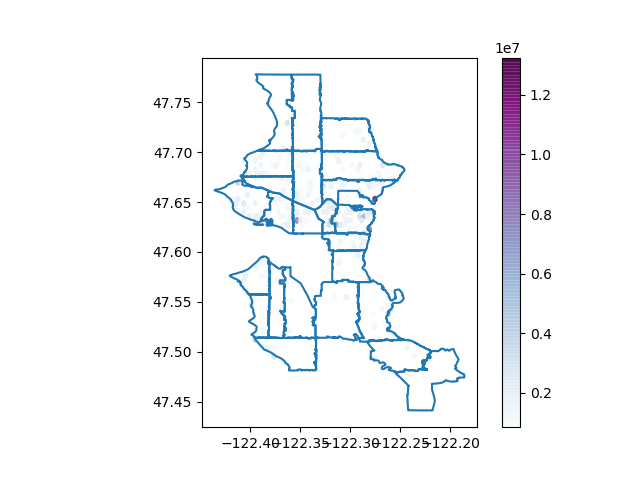

In [39]:
import numpy as np
%matplotlib notebook


f, ax = plt.subplots()
merged.boundary.plot(ax=ax)
hexbin = plt.hexbin(gdf['geometry'].x, gdf['geometry'].y, gridsize=50, alpha=0.8, 
           cmap='BuPu', C=gdf['PRICE'], reduce_C_function=np.median)
plt.colorbar(hexbin)

<IPython.core.display.Javascript object>


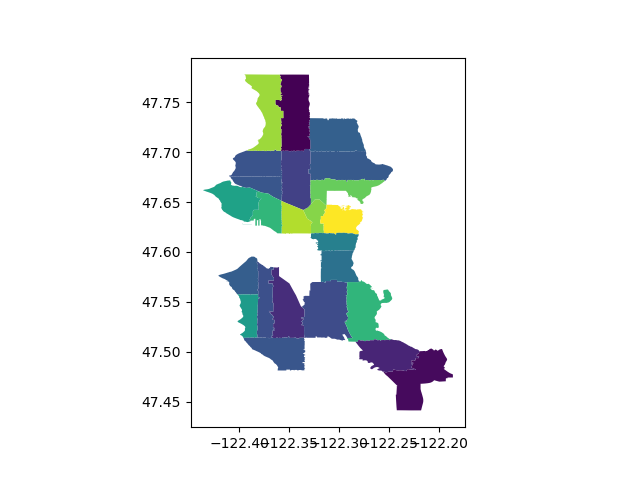

In [40]:
merged.plot(column='PRICE');

<IPython.core.display.Javascript object>


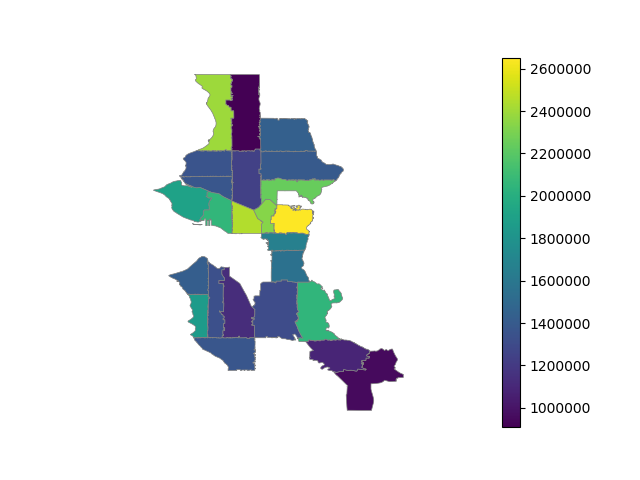

In [42]:
f, ax = plt.subplots(1)
merged.plot(column='PRICE',ax=ax, linewidth=0.5, edgecolor='0.5', legend=True)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [ ]:

# make up some data
x = [datetime.datetime.now() + datetime.timedelta(days=i) for i in range(12)]
y = [i+random.gauss(0,1) for i,_ in enumerate(x)]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()